# Airline Tweets Sentiment Analysis

---
author: Alex Kim
date: November 20, 2024
embed-resources: true
---

## Introduction

Air travel can often be a miserable experience for many people. Many travelers often express either their frustration or support online on a platform formally known as Twitter. These tweets by passagners are usually directed at airline customer service teams. To enhance the efficiency of customer support and improve passenger satisfaction, our airline's social team is leveraging machine learning to streamline tweet processing. This report outlines the development of a sentiment classification model that will alert customer service representatives to respond to negative tweets about the airline and for positive tweets to be automatically acknowledged. As a data scientist working for social team of a major US airline, our goal is to develop a model that accurately classifies tweets as one of negative, neutral, or positive in order to enhance responsiveness and engagement, making the airline's social media interactions more effective and customer-centric.

## Methods

In [17]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

To successfully develop an sentiment classification model, historical data of tweets and their sentiment will be primarily used. The source of the dataset that will be used is from Kaggle. This dataset consists of Twitter data that was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as “late flight” or “rude service”). The modifications of this dataset includes 1) keeping only the airline_sentiment, text, and airline variables, and 2) withholding some data that will be considered the production data.

### Data Dictionary

#### Response
* **sentiment** [object]: the sentiment of the tweet. One of negative, neutral, or positive

#### Feature
* **text** [object]: the full text of the tweet.

#### Additional Variables
* **airline** [object]: the airline the tweet was “sent” to.


### Data

In [18]:
# load data
tweets = pd.read_csv(
    "https://cs307.org/lab-08/data/tweets.csv",
)

tweets_train, tweets_test = train_test_split(
    tweets,
    test_size=0.25,
    random_state=42,
)
tweets_train

,sentiment,airline,text
2233,positive,Delta,@JetBlue Then en route to the airport the rebo...
10733,negative,United,@united now you've lost my bags too. At least...
400,neutral,US Airways,"@USAirways Hi, can you attach my AA FF# 94LXA6..."
7615,positive,United,"@United, will you fill it? Yes they will. Than..."
4099,negative,American,@AmericanAir thanks! I hope we get movies. Tv'...
...,...,...,...
5734,negative,United,@united Can i get a refund? I would like to bo...
5191,neutral,Virgin America,@VirginAmerica what is your policy on flying a...
5390,negative,United,@united I'm not sure how you can help. Your fl...
860,neutral,Virgin America,@VirginAmerica LAX to EWR - Middle seat on a r...


The tweet train dataset contains 8235 rows and 3 columns. This tells us that there are 8235 samples and 3 columns.

In [19]:
# summary statistics
## Counts and Proportions - Airline
airline_counts = tweets_train['airline'].value_counts()
print(airline_counts)

airline
United            2166
US Airways        1664
American          1551
Southwest         1347
Delta             1239
Virgin America     268
Name: count, dtype: int64


In [20]:
## Proportions - Airline
airline_proportion = tweets_train['airline'].value_counts(normalize=True).rename("proportion")
print(airline_proportion)

airline
United            0.263024
US Airways        0.202064
American          0.188342
Southwest         0.163570
Delta             0.150455
Virgin America    0.032544
Name: proportion, dtype: float64


In [21]:
## Word Occurrences
word_counter = CountVectorizer()

word_counts = word_counter.fit_transform(tweets_train['text']).todense()

for key, value in word_counter.vocabulary_.items():
    print(f"{key}: {value}")

print(word_counts)

jetblue: 5651
then: 9598
en: 3875
route: 8403
to: 9737
the: 9585
airport: 1420
rebooked: 8004
ticket: 9679
was: 10496
refunded: 8086
united: 10150
now: 6973
you: 10861
ve: 10343
lost: 6167
my: 6696
bags: 1897
too: 9766
at: 1743
least: 5958
nobody: 6882
has: 4968
done: 3621
anything: 1603
help: 5034
out: 7191
this: 9634
is: 5551
absurd: 1246
usairways: 10266
hi: 5070
can: 2444
attach: 1754
aa: 1176
ff: 4235
94lxa62: 1115
reservation: 8226
e2kvm4: 3752
thansk: 9578
will: 10632
fill: 4257
it: 5568
yes: 10846
they: 9615
thanks: 9573
bringyourown: 2275
kleankanteen: 5833
http: 5211
co: 2794
daaa0rqbxw: 3224
americanair: 1506
hope: 5154
we: 10523
get: 4679
movies: 6643
tv: 9927
were: 10563
broke: 2284
on: 7085
flight: 4330
over: 7208
your: 10868
staff: 9126
rsw: 8419
working: 10718
sliver: 8905
airlines: 1416
desk: 3406
not: 6942
helpful: 5038
any: 1595
information: 5424
about: 1240
our: 7187
understood: 10121
and: 1536
am: 1494
sympathetic: 9421
how: 5198
do: 3595
100: 42
back: 1866
shouldn

In [22]:
pd.DataFrame(
    word_counts,
    columns=sorted(list(word_counter.vocabulary_.keys())),
)

,00,000,000114,000ft,0016,00a,00am,00p,00pm,0162389030167,...,zones,zoom,zrh,zrh_airport,zsdgzydnde,zsuztnaijq,ztrdwv0n4l,zurich,zv2pt6trk9,zv6cfpohl5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
top_100_counter = CountVectorizer(max_features=100)
X_top_100 = top_100_counter.fit_transform(tweets_train['text'])
print("Top 100 Words:")
print(top_100_counter.get_feature_names_out())
print("")

Top 100 Words:
['about' 'after' 'again' 'airline' 'all' 'am' 'americanair' 'amp' 'an'
 'and' 'any' 'are' 'as' 'at' 'back' 'bag' 'be' 'been' 'but' 'by' 'call'
 'can' 'cancelled' 'co' 'customer' 'delayed' 'do' 'don' 'flight'
 'flightled' 'flights' 'for' 'from' 'gate' 'get' 'got' 'had' 'has' 'have'
 'help' 'hold' 'hour' 'hours' 'how' 'http' 'if' 'in' 'is' 'it' 'jetblue'
 'just' 'late' 'like' 'me' 'my' 'need' 'no' 'not' 'now' 'of' 'on' 'one'
 'or' 'our' 'out' 'over' 'phone' 'plane' 'please' 're' 'service' 'so'
 'southwestair' 'still' 'thank' 'thanks' 'that' 'the' 'there' 'they'
 'this' 'time' 'to' 'today' 'united' 'up' 'us' 'usairways' 've'
 'virginamerica' 'was' 'we' 'what' 'when' 'why' 'will' 'with' 'would'
 'you' 'your']



In [24]:
X_top_100_dense = X_top_100.todense()
X_top_100_dense

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [25]:
X_top_100.shape

(8235, 100)

In [26]:
plane_idx = np.where(top_100_counter.get_feature_names_out() == "cancelled")
plane_count = np.sum(X_top_100.todense()[:, plane_idx])
print('The Word "cancelled" Appears:', plane_count)

plane_idx = np.where(top_100_counter.get_feature_names_out() == "please")
plane_count = np.sum(X_top_100.todense()[:, plane_idx])
print('The Word "please" Appears:', plane_count)

plane_idx = np.where(top_100_counter.get_feature_names_out() == "thanks")
plane_count = np.sum(X_top_100.todense()[:, plane_idx])
print('The Word "thanks" Appears:', plane_count)

The Word "cancelled" Appears: 595
The Word "please" Appears: 325
The Word "thanks" Appears: 587


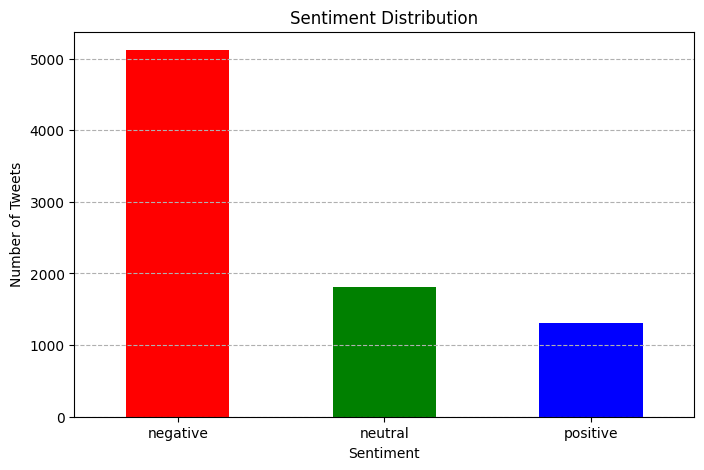

In [27]:
# visualizations
sentiment_counts = tweets_train['sentiment'].value_counts()
plt.figure(figsize=(8,5))
sentiment_counts.plot(kind='bar', color=['red','green','blue'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.grid(axis='y',linestyle='--')
plt.show()

The sentiment distribution chart clearly shows that the negative tweets were the majority of all tweets. This most obviously indicates that there has been a high volume of customers or passangers who are experiencing dissatisfaction with the airline's services. 

### Models

In [28]:
# process data for ML
# create X and y for train data
X_train = tweets_train["text"]
y_train = tweets_train["sentiment"]

# create X and y for test data
X_test = tweets_test["text"]
y_test = tweets_test["sentiment"]

In [29]:
# train models

pipeline = Pipeline([
    ('count', CountVectorizer(stop_words=None,max_features=1000)),
    ('clf', LogisticRegression(solver='liblinear',random_state=42))
])


# define parameter grid
param_grid = {
    "count__ngram_range": [(1,1), (1,2)],
    "count__max_df": [0.3,0.5,0.7],
    "count__max_features": [12000,14000,16000,20000],
    "clf__C": [0.05,0.1,0.5,1.0,2.0,5.0,10.0,15.0,20.0],
}

# create GridSearchCV object
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
)

In [30]:
# Fit the grid search object on the training data
mod = grid_search.fit(X_train, y_train)

In [31]:
mod.predict_proba(X_test)[:10]

array([[0.30468226, 0.59930102, 0.09601672],
       [0.59074108, 0.00262518, 0.40663374],
       [0.50425302, 0.13520976, 0.36053721],
       [0.64336731, 0.04090475, 0.31572794],
       [0.06418536, 0.72070537, 0.21510927],
       [0.01561859, 0.02135805, 0.96302336],
       [0.58253964, 0.40909175, 0.00836861],
       [0.14980054, 0.68669911, 0.16350035],
       [0.83579957, 0.15568317, 0.00851726],
       [0.87627658, 0.12250549, 0.00121793]])

In [32]:
# make predictions on the test set using the best model
y_pred = mod.predict(X_test)

## Results

In [33]:
# report model metrics
# calculate test metrics
test_accuracy = accuracy_score(y_test, y_pred)
production_accruacy = accuracy_score(y_train, mod.predict(X_train))
print(f"Test Accuracy: {test_accuracy}")
print(f"Production Accuracy: {production_accruacy}")

Test Accuracy: 0.7989071038251366
Production Accuracy: 0.9530054644808743


The Twitter sentiment classification model achieves a test accuracy of 0.7989 and production accuracy of 0.9530.

## Discussion

Through the development process of the model that classifies tweets as one of negative, neutral, or positive, I developed a model that achieves a test accuracy of 0.7989 and production accuracy of 0.9530. These results tells us that the performance of the model is solid with a decent accuracy level. However, despite pretty strong accuracy scores, the model can most definitely make mistakes in classifying sentiments. There may be cases where neutral and positive tweets are misclassified as Negative. This can lead to reduction in the efficiency of the customer service team. It can put efforts and energy spent by the customer service to waste by triggering unnecessary responses to non-critical tweets. While resources by customer serivce may be wasted, the overall impact on customer experience is quite minimal. On the other hand, the severity in a case where Negative Tweets are Misclassified as Neutral or Positive is considered extremely high. This is because ignoring complaints or requests for change made by customers can significantly harm customer satisfaction and their experience. This can bring about detrimental impacts as the customer complaints may go unaddressed, leading to further customer frustration and a poor brand/public image. 

### Conclusion

Overall, the Twitter sentiment classification model performs pretty good overall, achieving a test accuracy of 0.7989 and production accuracy of 0.9530. However, the model still requires further improvements or refinements, specifically in handling some edge cases. Out of several possible mistakes, misclassifying negative tweets as neutral or positive can bring about the highest risk to the airline's reputation and public image as it can leave several ciritcal issues or complaints unaddressed. Therefore, more efforts should be put into minimizing or reducing false negatives for negative sentiment classifications.